In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Datamining

/content/drive/MyDrive/Datamining


In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
replace Dataset/Test/Normal/IM-0001-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# importing libraries
import os
from glob import glob
import pandas as pd
import numpy as np
import cv2
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# nn
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
from keras.layers import GlobalAveragePooling2D, Input, Concatenate, Dropout
from keras.models import Model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, Callback

#bokeh
from bokeh.models import ColumnDataSource, HoverTool, Panel, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.palettes import Spectral6

import warnings
warnings.filterwarnings('ignore')

In [ ]:
base_dir = "/content/drive/MyDrive/Datamining/Dataset"
train_dir = os.path.join(base_dir, "Train/")
test_dir = os.path.join(base_dir, "Test/")
val_dir = os.path.join(base_dir, "Validation/")

In [ ]:

normal_train_path = train_dir + '/Normal'
unormal_train_pat = train_dir + '/Pneumonia'
normal_val_path = val_dir + '/Normal'
unormal_val_path = val_dir + '/Pneumonia'
normal_test_path = test_dir + '/Normal'
unormal_test_path = test_dir + '/Pneumonia'

normal_len_train = len(os.listdir(normal_train_path))
unormal_len_train = len(os.listdir(unormal_train_pat))
normal_len_val = len(os.listdir(normal_val_path))
unormal_len_val = len(os.listdir(unormal_val_path))
normal_len_test = len(os.listdir(normal_test_path))
unormal_len_test = len(os.listdir(unormal_test_path))

print("jumlah dataset Training : ", normal_len_train + unormal_len_train)
print("jumlah dataset Validasi : ", normal_len_val + unormal_len_val)
print("jumlah dataset Test     : ", normal_len_test + unormal_len_test)
print("jumlah total Dataset    : ", normal_len_train + unormal_len_train + normal_len_val + unormal_len_val + normal_len_test + unormal_len_test)
print("\n")
print("jumlah train kelas Normal : ", normal_len_train)
print("jumlah train kelas PNEUMONIA : ", unormal_len_train)
print("jumlah validasi kelas Normal : ", normal_len_val)
print("jumlah validasi kelas PNEUMONIA : ", unormal_len_val)
print("jumlah test kelas Normal : ", normal_len_test)
print("jumlah test kelas PNEUMONIA : ", unormal_len_test)

jumlah dataset Training :  2532
jumlah dataset Validasi :  587
jumlah dataset Test     :  585
jumlah total Dataset    :  3704


jumlah train kelas Normal :  1266
jumlah train kelas PNEUMONIA :  1266
jumlah validasi kelas Normal :  159
jumlah validasi kelas PNEUMONIA :  428
jumlah test kelas Normal :  158
jumlah test kelas PNEUMONIA :  427


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=60,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='reflect')

test_datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=60,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='reflect')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=24,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=24,
        class_mode='binary'
)

Found 2532 images belonging to 2 classes.
Found 587 images belonging to 2 classes.
Found 585 images belonging to 2 classes.


In [ ]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
callbacks = EarlyStopping(monitor='loss', patience=20, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Datamining/coba1.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='accuracy', verbose = 1, save_best_only = True)

In [ ]:
import tensorflow as tf

# import pretrain model in this case i use Resnet Model and setting the parameter "include_top" to false so i can change it
DenseNet_base = tf.keras.applications.densenet.DenseNet169(include_top=False, weights='imagenet',
                                                           input_tensor=None, input_shape=(224, 224,3))

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
'''
melakukan setting bahwa model pretrained tidak akan dilatih ulang
'''
DenseNet_base.trainable = False

In [ ]:
print('Adding new layers')
output = DenseNet_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(256,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) 
print('New layers Finishing Added!!!!')

Adding new layers
New layers Finishing Added!!!!


In [ ]:
DenseNet_model = Model(DenseNet_base.input, output)


DenseNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input

DenseNet_model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss='binary_crossentropy', 
                        metrics =['accuracy'])

In [ ]:
history = DenseNet_model.fit_generator(
      train_generator,
      steps_per_epoch=80,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=24,  #  images = batch_size * steps
      callbacks = [callbacks, best_model])

Epoch 1/100
80/80 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.6959
Epoch 1: accuracy improved from -inf to 0.69589, saving model to /content/drive/MyDrive/Datamining/ coba1.h5
80/80 [==============================] - 342s 4s/step - loss: 0.6774 - accuracy: 0.6959 - val_loss: 0.6665 - val_accuracy: 0.6562
Epoch 2/100
80/80 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8057
Epoch 2: accuracy improved from 0.69589 to 0.80569, saving model to /content/drive/MyDrive/Datamining/ coba1.h5
80/80 [==============================] - 79s 984ms/step - loss: 0.4545 - accuracy: 0.8057 - val_loss: 0.4129 - val_accuracy: 0.8056
Epoch 3/100
80/80 [==============================] - ETA: 0s - loss: 0.3798 - accuracy: 0.8487
Epoch 3: accuracy improved from 0.80569 to 0.84874, saving model to /content/drive/MyDrive/Datamining/ coba1.h5
80/80 [==============================] - 77s 963ms/step - loss: 0.3798 - accuracy: 0.8487 - val_loss: 0.3578 - val_accur

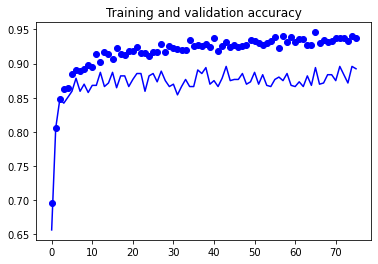

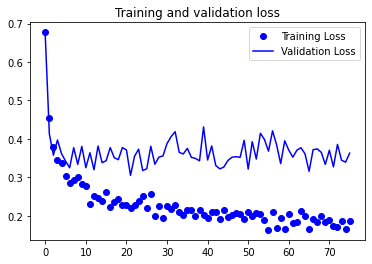

In [ ]:
import matplotlib.pyplot as plt   
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/Datamining/ coba1.h5'
model = load_model(model_path)

Found 585 images belonging to 2 classes.
Accuracy  : 0.9435897435897436
Precision : 0.9465867606026988
f1Score : 0.9443636582879459
[[149   9]
 [ 24 403]]


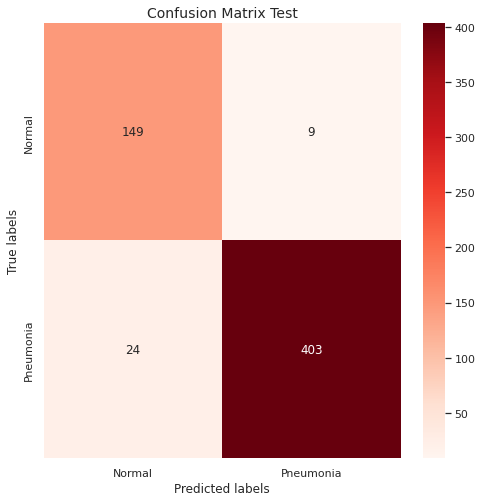

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=224; width=224
batch_size=20

test_datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=60,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='reflect')

TESTING_DIR = "/content/drive/MyDrive/Datamining/Dataset/Test"

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.86      0.94      0.90       158
   Pneumonia       0.98      0.94      0.96       427

    accuracy                           0.94       585
   macro avg       0.92      0.94      0.93       585
weighted avg       0.95      0.94      0.94       585



Text(0.5, 1.0, 'Training and validation loss')

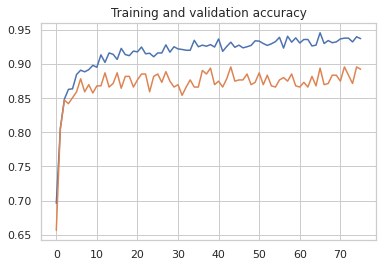

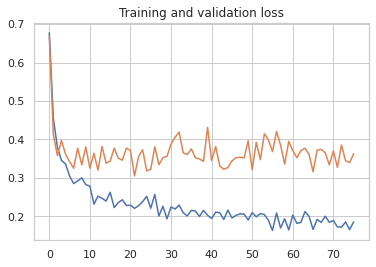

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')